

### 1. 随机梯度下降（SGD）

**原理**在标准梯度下降（也称为批量梯度下降）中，你会计算整个训练集的梯度，这可能会非常慢，特别是数据集很大时。随机梯度下降通过每次迭代仅使用一个训练样例来更新参数，这样可以大大加快学习速度，并且能够在线更新模型。

**实现**在现有的梯度下降算法中，你需要进行以下修改
- 在每次迭代中，随机选择一个样本\( (x^{(i)}, y^{(i)}) \)。
- 计算该样本的梯度，并更新\( w \)和\( b \)。

### 2. 小批量梯度下降

**原理**小批量梯度下降是标准梯度下降和随机梯度下降的折中，它每次迭代使用一个小批量（通常是16、32、64等）的样本来计算梯度。它试图平衡批量梯度下降的准确性和随机梯度下降的速度。

**实现**在你的梯度下降算法中，你需要进行以下修改
- 在每次迭代中，随机选择一个小批量样本集。
- 计算这个小批量的梯度，并更新\( w \)和\( b \)。

### 修改线性回归模型的训练方法

在你的`LinearRegression`类中，你可能需要添加一个新方法或修改`gradient_descent`方法来包含一个参数，该参数指示你正在使用的是批量、随机还是小批量梯度下降。然后，根据该参数的值来决定如何选择样本和计算梯度。

### 对比不同学习方法的影响

在实现了随机梯度下降和小批量梯度下降后，你应该使用客户价值数据来训练你的模型，并观察这些不同的训练方法对学习过程和模型预测准确性的影响。你可能想比较以下方面
- 收敛速度不同方法需要多少迭代次数才能收敛。
- 最终模型的性能可以用均方误差或均方根误差来衡量。
- 计算效率在相同迭代次数的情况下，不同方法的计算时间。


In [25]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# 定义线性回归类
class LinearRegression():
    # 定义预测函数
    def predict(self, x):
        # 根据当前的模型参数进行预测
        y = x.dot(self.w) + self.b  # 参见方程 Eq.(2.3)
        return y

    # 定义损失函数
    def loss_function(self, train_x, train_y):
        # 数据量大小
        inst_num = train_x.shape[0]
        # 根据模型进行预测
        pred_y = train_x.dot(self.w) + self.b  # 训练预测
        # 计算均方误差损失
        loss = np.sum((pred_y - train_y) ** 2) / (2 * inst_num)  # 参见方程 Eq.(2.4)
        return loss

    # 定义计算梯度的函数
    def calculate_grad(self, train_x, train_y):
        # 数据量大小
        inst_num = train_x.shape[0]
        # 根据模型进行预测
        pred_y = train_x.dot(self.w) + self.b  # 训练预测
        # 计算权重的梯度
        grad_w = (train_x.T).dot((pred_y - train_y)) / inst_num  # 参见方程 Eq.(2.5)
        # 计算偏置的梯度
        grad_b = np.sum((pred_y - train_y)) / inst_num  # 参见方程 Eq.(2.6)
        return grad_w, grad_b

    # 梯度下降算法
    def gradient_descent(self, train_x, train_y, learn_rate, max_iter, epsilon):
        # 初始化损失列表，用于记录每次迭代的损失
        loss_list = []
        for i in range(max_iter):
            # 计算当前参数下的损失
            loss_old = self.loss_function(train_x, train_y)
            loss_list.append(loss_old)
            # 计算梯度
            grad_w, grad_b = self.calculate_grad(train_x, train_y)
            # 更新模型参数
            self.w = self.w - learn_rate * grad_w
            self.b = self.b - learn_rate * grad_b
            # 计算更新后的损失
            loss_new = self.loss_function(train_x, train_y)
            # 如果新旧损失之间的差异小于epsilon，则停止迭代
            if abs(loss_new - loss_old) <= epsilon:
                break
        return loss_list

    # 训练线性回归模型
    def fit(self, train_x, train_y, learn_rate=0.01, max_iter=1000, epsilon=1e-5, method='batch', batch_size=32):
        global X_batch, y_batch
        # 特征维度
        n_samples,feat_num= train_x.shape
        # 初始化模型参数
        self.w = np.zeros((feat_num, 1))
        self.b = 0.0

        # Batch Gradient Descent
        if method == 'batch':
            X_batch, y_batch = train_x, train_y

        # Stochastic Gradient Descent
        elif method == 'stochastic':
            idx = np.random.randint(n_samples)
            X_batch, y_batch = train_x[idx:idx+1], train_y[idx:idx+1]

        # Mini-batch Gradient Descent
        elif method == 'mini-batch':
            idx = np.random.randint(n_samples, size=batch_size)
            X_batch, y_batch = train_x[idx], train_y[idx]

        # 使用梯度下降算法学习模型参数
        loss_list = self.gradient_descent(X_batch, y_batch, learn_rate, max_iter, epsilon)
        # 可视化训练过程
        self.training_visualization(loss_list)

    # 训练过程可视化
    def training_visualization(self, loss_list):
        # 绘制损失随迭代次数变化的图
        plt.plot(loss_list, color='red')
        plt.xlabel("iterations")
        plt.ylabel("loss")
        plt.savefig("loss.png", bbox_inches='tight', dpi=400)
        plt.show()


In [26]:
# import necessary libs
import pandas as pd
from sklearn.linear_model import LinearRegression as LR_SKL
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# load experiment data
data = pd.read_csv('Client_Value.csv',encoding='GBK')
# data normalization
scaler = StandardScaler()
data = scaler.fit_transform(data)
# divide data into train/test, 70% for train, 30% for test
X_train, X_test, Y_train, Y_test = train_test_split(data[:, 1:],
                                                    data[:, 0],
                                                    test_size=0.3,
                                                    shuffle=True)
X_train = X_train.reshape(-1, 5)
Y_train = Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 5)
Y_test = Y_test.reshape(-1, 1)
# set training parameters and define eval metric
learnrate = 0.01
maxiter = 1000
eps = 1e-5


def cal_rmse(y_test, y_pred):
    loss = np.sum((y_pred - y_test) ** 2) / (len(y_test))
    return np.sqrt(loss)



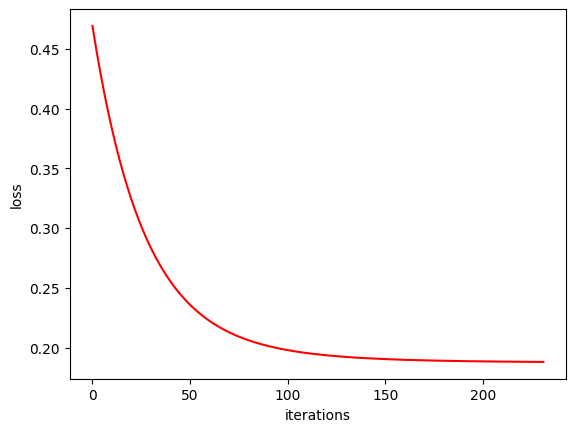

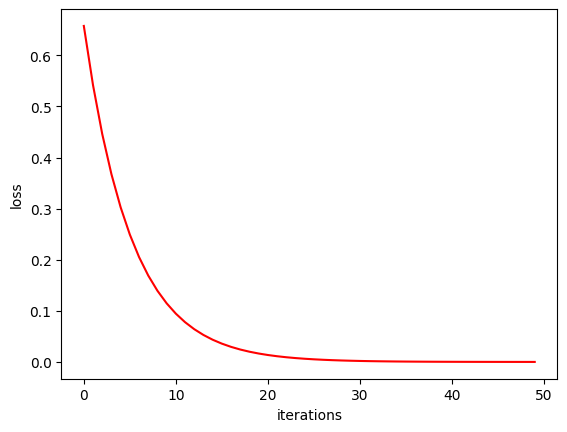

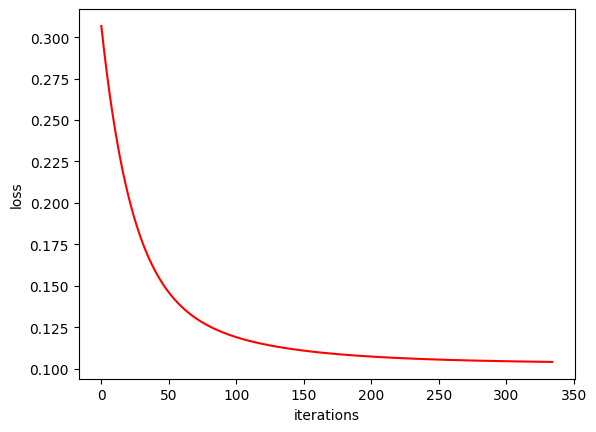

Batch Gradient Descent RMSE: 0.750
Stochastic Gradient Descent RMSE: 0.778
Mini-batch Gradient Descent RMSE: 0.730


In [27]:
# Fit using Batch Gradient Descent
LR_model1 = LinearRegression()
LR_model1.fit(X_train, Y_train,max_iter=maxiter,learn_rate=learnrate,epsilon=eps,method='batch')
Y_test_pred_BGD = LR_model1.predict(X_test)
rmse_BGD = cal_rmse(Y_test, Y_test_pred_BGD)

# Fit using Stochastic Gradient Descent
LR_model2 = LinearRegression()
LR_model2.fit(X_train, Y_train,max_iter=maxiter,learn_rate=learnrate,epsilon=eps, method='stochastic')
Y_test_pred_SGD = LR_model2.predict(X_test)
rmse_SGD = cal_rmse(Y_test, Y_test_pred_SGD)

# Fit using Mini-batch Gradient Descent
LR_model3 = LinearRegression()
LR_model3.fit(X_train, Y_train,max_iter=maxiter,learn_rate=learnrate,epsilon=eps, method='mini-batch', batch_size=32)
Y_test_pred_MBGD = LR_model3.predict(X_test)
rmse_MBGD = cal_rmse(Y_test, Y_test_pred_MBGD)

# Print out the RMSE for each method
print("Batch Gradient Descent RMSE: %.3f" % rmse_BGD)
print("Stochastic Gradient Descent RMSE: %.3f" % rmse_SGD)
print("Mini-batch Gradient Descent RMSE: %.3f" % rmse_MBGD)


## 遇到的问题

三种梯度相等的均方误差相同
```python
LR_model1 = LinearRegression()
LR_model2 = LinearRegression()
LR_model3 = LinearRegression()
```
需要定义三个实际，不然同一个实例的权重相同

梯度下降是一种常用的优化算法，用于最小化函数。在机器学习中，这通常涉及到最小化损失函数来训练模型。梯度下降有三种主要的变体：批量梯度下降（Batch Gradient Descent），随机梯度下降（Stochastic Gradient Descent），和小批量梯度下降（Mini-batch Gradient Descent）。以下是这三种方法的主要区别：

### 1. 批量梯度下降（Batch Gradient Descent）:
- **原理**: 在每次迭代中，批量梯度下降使用所有的样本来计算损失函数的梯度。
- **优点**: 每次更新都朝着准确的下降方向，收敛到全局最小值（对凸问题）或局部最小值（对非凸问题）。
- **缺点**: 对于大数据集来说非常慢，因为每次更新都需要计算整个数据集的梯度。在大规模数据集上难以应用。

### 2. 随机梯度下降（Stochastic Gradient Descent, SGD）:
- **原理**: 在每次迭代中，随机梯度下降随机选择一个样本来计算梯度。
- **优点**: 更新速度快，能够在线更新模型，适用于大规模数据集。
- **缺点**: 更新比较嘈杂，可能会导致损失函数波动甚至偏离最小值。虽然它通常最终会接近最小值，但可能不会收敛到最小值。

### 3. 小批量梯度下降（Mini-batch Gradient Descent）:
- **原理**: 在每次迭代中，小批量梯度下降使用一批样本（通常在10-500之间）来计算梯度。
- **优点**: 既可以保持一定程度的嘈杂性，有助于跳出局部最小值，又可以较快地进行计算。它是现实中最常用的方法之一。
- **缺点**: 需要确定最佳的批量大小。

### 总结：

- **收敛速度**：通常来说，SGD和Mini-batch GD的收敛速度比Batch GD快，特别是当数据集很大时。
- **精度与稳定性**：Batch GD通常可以更稳定地收敛到最优解，而SGD和Mini-batch GD由于更新较为频繁且嘈杂，可能在最优解附近波动。
- **内存需求**：Batch GD需要的内存随着数据集大小线性增长，而SGD和Mini-batch GD可以更好地控制内存需求，特别适合大数据集。
- **在线/实时更新**：SGD和Mini-batch GD可以更容易地适用于在线学习和实时更新。
